<a href="https://colab.research.google.com/github/Jonny-T87/Food-Sales-Predictions-/blob/main/Predict_Sales_ML_Project_1__Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project

- Jonny Tesfahun

## Opening and Loading Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive

In [ ]:
filename = '/content/drive/MyDrive/DojoBootCamp/Project Files/sales_predictions.csv'
df = pd.read_csv(filename)
df_ml = df.copy()

In [ ]:
#Google Colab Notebook and verify the data by using the df.head() command.  
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Cleaning Dataset 

1. How many rows and columns?

    - I will use 12 columns. Since most of the items can be used to determine diffrent aspects of stores, products, and prices of the data. Thus, no column will be deleted. There is 8,523 rows.

2.  What are the datatypes of each variable?

    - Outlet_Establishment_Year is Integer Type (1)
    - Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales are Float Types (4)
    - Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type are Object Types (7)

In [ ]:
df.shape

(8523, 12)

In [ ]:
# Looking at data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# Looking at more info than data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3. Are there duplicates? If so, drop any duplicates.

  - There looks to be no duplicates in the dataset.

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [ ]:
df.duplicated().sum()

0

4. Identify missing values.
  - Outlet_Size has 2,410 missing data
  - Item_Weight has 1,463 missing data

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

  - I will also replace NaN for Outlet_Size with 'missing' to keep the statistical data but also show that there is no data for store size.

  - I will replace NaN for Item_Weight with Mean of the column. This will keep consistency in the column and dataset.

In [ ]:
# Replaced 'NaN' with 'Missing'
df['Outlet_Size'].fillna('Missing', inplace=True)
# Checked for any 'NaN' and showed that there was none
df['Outlet_Size'].isna().sum()

0

In [ ]:
# Finding avg mean for 'Item_Weight' and creating a key
Itm_Wght_Avg = round(df['Item_Weight'].mean(), 2)
Itm_Wght_Avg

12.86

In [ ]:
# Replaced 'NaN' with mean for 'Item_Weight' column
df['Item_Weight'].fillna(Itm_Wght_Avg, inplace=True)
# Checked for any missing data, looks good
df['Item_Weight'].isna().sum()

0

6. Confirm that there are no missing values after addressing them.

In [ ]:
#Checking whole dataset for any 'NaN' and there is none
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

  - Item_Fat_Content column has a few typo errors such as LF, low fat, Low Fat, reg, and Regular

In [ ]:
# trying to look at unique data
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
# looking at columns that may have inconsistency 
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


-- Fat Content Typo Errors

In [ ]:
# looks like 'LF' and 'Low Fat' and 'low fat'
# And 'reg' and 'Regular' are the same
df.groupby(['Item_Fat_Content']).sum()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Fat_Content,,,,,
LF,4048.995,21.054330,43857.1062,631348,6.552424e+05
Low Fat,65837.520,326.541080,717390.8394,10167044,1.101503e+07
Regular,36784.405,200.970026,409413.1214,5771667,6.457454e+06
low fat,1415.455,7.313655,15071.7328,223539,2.338270e+05
reg,1502.780,7.764190,15948.6810,233923,2.295765e+05


In [ ]:
# Changed 'LF' tp "Low Fat"
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')

In [ ]:
#Changed 'reg' to 'Regular'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')

In [ ]:
# Changed 'low fat' to 'Low Fat'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')

In [ ]:
# Now dataset in column is consistent
df.groupby(['Item_Fat_Content']).sum()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Fat_Content,,,,,
Low Fat,71301.970,354.909065,776319.6784,11021931,1.190409e+07
Regular,38287.185,208.734216,425361.8024,6005590,6.687031e+06


8. For any numerical columns, obtain the summary statistics of each (min, max, mean)

  - For more consist data and visual appeal I will round by 2 decimals columns Item_MRP & Item_Outlet_Sales
  - To get summary statistics of each (min, max, mean) for columns will use .describe()

In [ ]:
# Rounding 'Item_MRP' column
df['Item_MRP'] = df['Item_MRP'].round(2)

In [ ]:
# Rounding 'Item_Outlet_Sales' column
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].round(2)

In [ ]:
# Rounding the 2 columns above did not change much statistically
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.858049,0.066132,140.992810,1997.831867,2181.288926
std,4.226124,0.051598,62.275166,8.371760,1706.499605
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.825000,1987.000000,834.245000
50%,12.860000,0.053931,143.010000,1999.000000,1794.330000
75%,16.000000,0.094585,185.645000,2004.000000,3101.300000
max,21.350000,0.328391,266.890000,2009.000000,13086.960000


In [ ]:
# Checking it visually 
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.016760,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.10,OUT010,1998,Missing,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.000000,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


9. Extra Credit - Would like to show Item_Visibility as percentage. Just so the dataset can be more visually appealing and readable  

In [ ]:
 # Was able to change formate of column so that data shows as percentage (1.00%), It took a while
 # I got assistance from https://stackoverflow.com/questions/54110289/pandas-dataframe-column-of-floats-to-percentage-style-error
df['Item_Visibility'] = df['Item_Visibility'].astype(float).map("{:.2%}".format)

In [ ]:
df['Item_Visibility'].head()

0    1.60%
1    1.93%
2    1.68%
3    0.00%
4    0.00%
Name: Item_Visibility, dtype: object

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,1.60%,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,1.93%,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,1.68%,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00%,Fruits and Vegetables,182.10,OUT010,1998,Missing,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00%,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


## Visual Exploratory Data Analysis: 

- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Looking for correlations

In [ ]:
df.corr()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,0.024755,-0.008447,0.011567
Item_MRP,0.024755,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008447,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011567,0.567574,-0.049135,1.000000


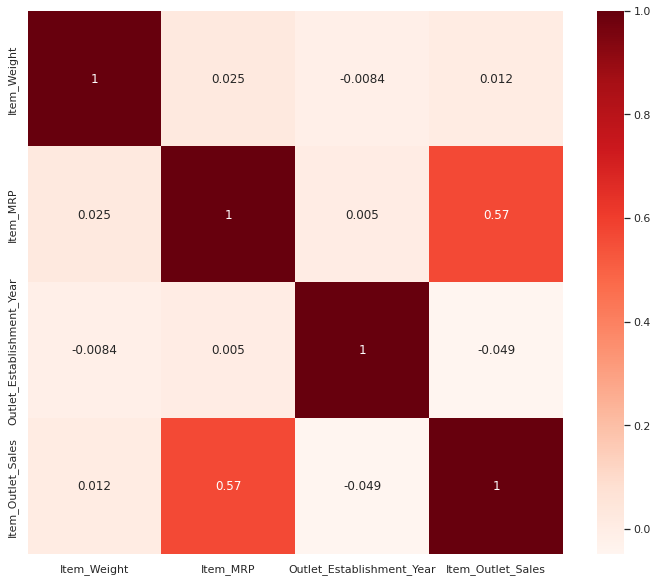

In [ ]:
# Looking at the dataset correlations or lack there of
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='Reds', annot=True);

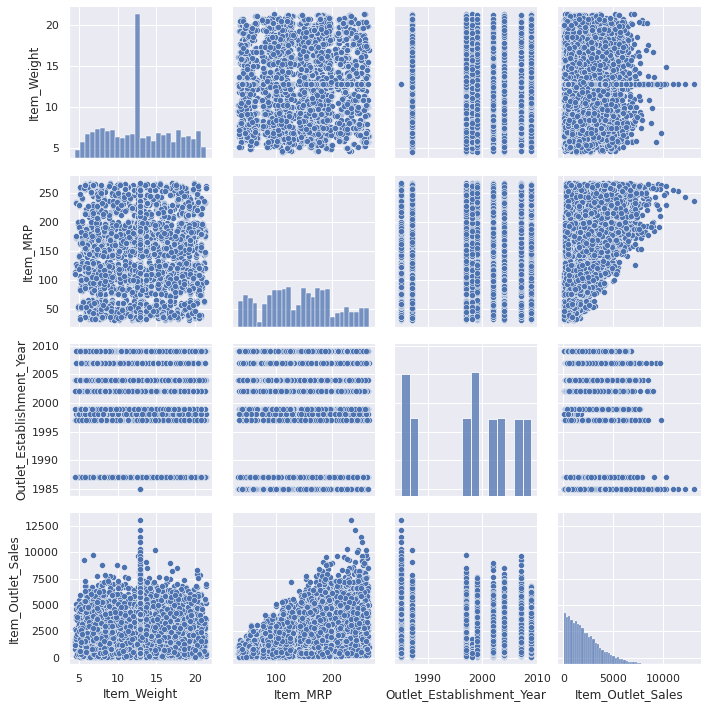

In [ ]:
# Using seaborn pairplot to look for any correlations with varibles 
sns.pairplot(df)

Histogram of Item Weight

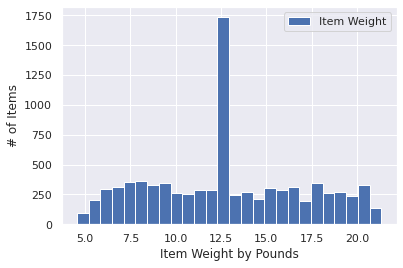

In [ ]:
df['Item_Weight'].hist(label='Item Weight', bins='auto')
plt.xlabel('Item Weight by Pounds')
plt.ylabel('# of Items')
plt.legend();

Histogram of Item MRP in $ with Red color

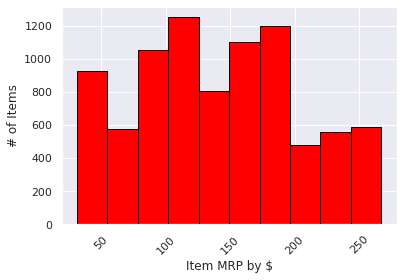

In [ ]:
df['Item_MRP'].hist(bins=10, color='red', edgecolor='black')
plt.xlabel('Item MRP by $')
plt.ylabel('# of Items')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')

Seaborn horizontal histogram of Store Oulet Sizes

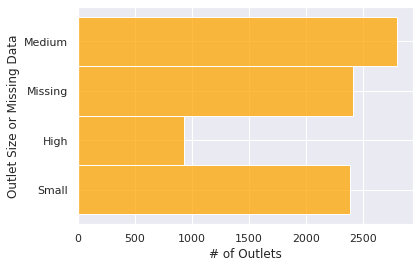

In [ ]:
sns.histplot(data=df, y='Outlet_Size', color='orange')
plt.xlabel('# of Outlets')
plt.ylabel('Outlet Size or Missing Data');

Boxplot of Item_Weight and Item_MRP

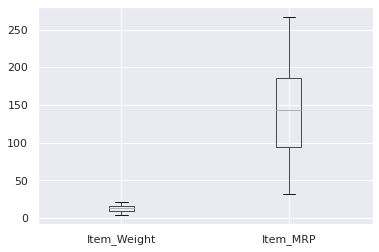

In [ ]:
columns = ['Item_Weight', 'Item_MRP']
boxplot = df.boxplot(column=['Item_Weight', 'Item_MRP'])  

Boxplot of Item Outlet Sales and it shows alot of outliers

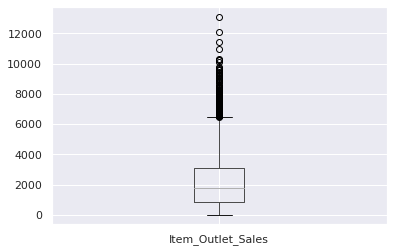

In [ ]:
boxplot = df.boxplot(column=['Item_Outlet_Sales']); 

Comparing Item Outlet Sales to Outlet Size using seaborn boxplot

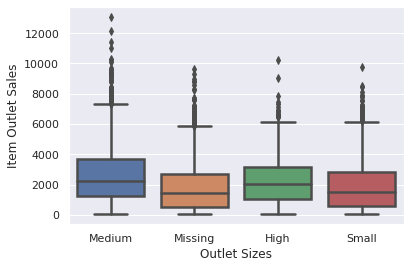

In [ ]:
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales',data=df, linewidth=2.5)
plt.xlabel('Outlet Sizes')
plt.ylabel('Item Outlet Sales');

Scatter plot of Item MRP to Item Outlet Sales. Seems to show the higher item mrp the greater the item outlet sales.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


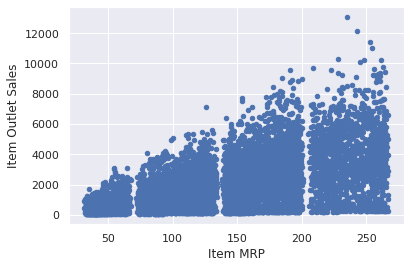

In [ ]:
df.plot.scatter(x='Item_MRP', y='Item_Outlet_Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales');

In [ ]:
Item_MRP_Filter = df[(df['Item_MRP'] > 100) & (df['Item_MRP'] < 200)]

In [ ]:
Outlet_Size_Weight = df.groupby('Outlet_Size')['Item_Weight'].mean()
Outlet_Size_Weight

Outlet_Size
High       13.006148
Medium     12.883562
Missing    12.778479
Small      12.850712
Name: Item_Weight, dtype: float64

Horizontal bar graph of Avg. Item of Product Weight compared to Store Size

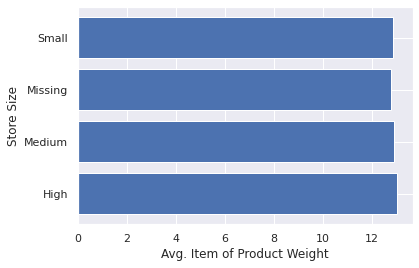

In [ ]:
plt.barh(Outlet_Size_Weight.index, Outlet_Size_Weight.values)
plt.xlabel('Avg. Item of Product Weight')
plt.ylabel('Store Size');

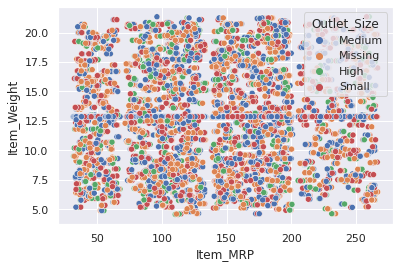

In [ ]:
sns.scatterplot(data=df, x='Item_MRP', y='Item_Weight', hue='Outlet_Size');

##Data Visualizations to help your stakeholders better understand trends in the data. 

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,1.60%,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,1.93%,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,1.68%,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00%,Fruits and Vegetables,182.10,OUT010,1998,Missing,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00%,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


- What is the average sales for diffrent Grocery Outlet Sizes?

In [ ]:
Outlet_Type_Sales = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
Outlet_Type_Sales

Outlet_Type
Grocery Store         339.828458
Supermarket Type1    2316.181207
Supermarket Type2    1995.498718
Supermarket Type3    3694.038396
Name: Item_Outlet_Sales, dtype: float64

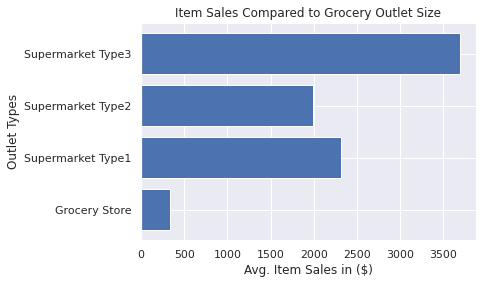

In [ ]:
plt.barh(Outlet_Type_Sales.index, Outlet_Type_Sales.values)
plt.xlabel('Avg. Item Sales in ($)')
plt.ylabel('Outlet Types')
plt.title('Item Sales Compared to Grocery Outlet Size');

- How much sales are there for Outlets in Tier 3 locations?

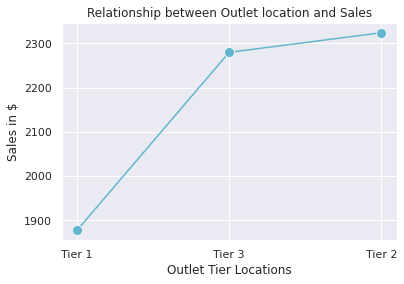

In [ ]:
sns.lineplot(data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales', color= 'c', ci = None, marker= 'o', markersize = 10)
plt.xlabel('Outlet Tier Locations')
plt.ylabel('Sales in $')
plt.title('Relationship between Outlet location and Sales');
#plt.tight_layout()
#plt.savefig('OutletSales_OutletLocation.jpg', dpi = 300);

- What are Item Sales per Store Size?

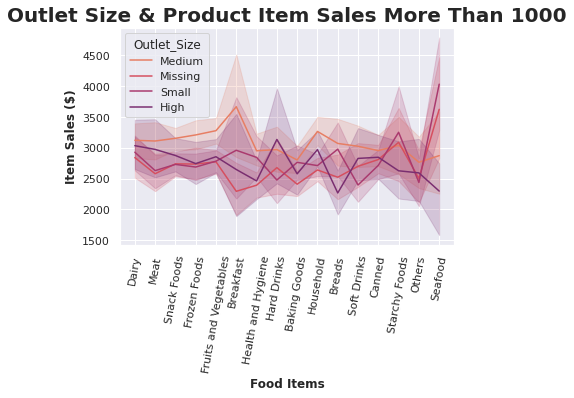

In [ ]:
sns.set(style="darkgrid")    
sns.lineplot(
    data=df.query("Item_Outlet_Sales > 1000"),
    x="Item_Type", y="Item_Outlet_Sales", hue="Outlet_Size",
     palette="flare"
)
plt.xticks(rotation = 80)
plt.xlabel('Food Items', fontweight='bold')
plt.ylabel('Item Sales ($)', fontweight='bold')
plt.title('Outlet Size & Product Item Sales More Than 1000', fontsize = 20, fontweight = 'bold');

- Do Low Fat Items Cost more than Regulare Fat Items?

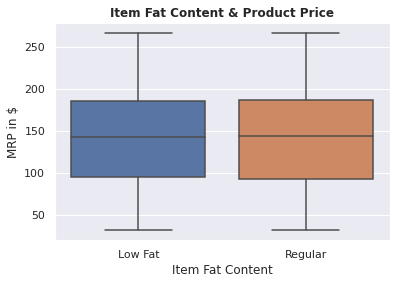

In [ ]:
sns.boxplot(data=df, x='Item_Fat_Content', y='Item_MRP')
plt.title('Item Fat Content & Product Price', fontweight='bold')
plt.xlabel('Item Fat Content')
plt.ylabel('MRP in $');

- Do Low Fat Items have more sales than Regulare Fat Items?

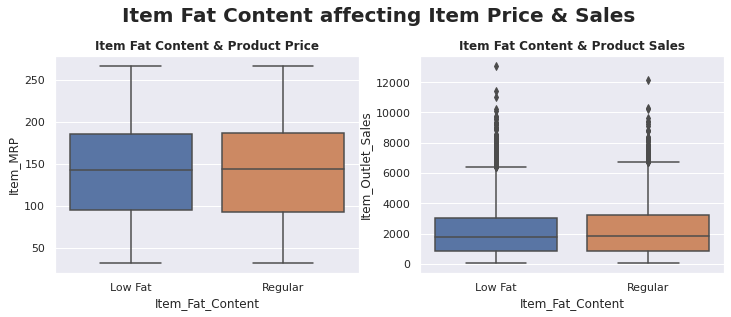

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12,4))

sns.boxplot(data=df, x='Item_Fat_Content', y='Item_MRP', ax=axes[0])
axes[0].set_title('Item Fat Content & Product Price', fontweight='bold')

sns.boxplot(data=df, x='Item_Fat_Content', y='Item_Outlet_Sales', ax=axes[1])
axes[1].set_title('Item Fat Content & Product Sales', fontweight='bold')

fig.suptitle('Item Fat Content affecting Item Price & Sales', fontsize = 20, fontweight = 'bold', y=1.05);

- What are Product Sales and Item Prices compared to Outlet Store Sizes?

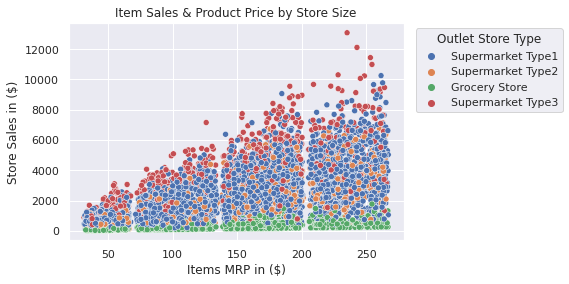

In [ ]:
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Type')
plt.legend(title='Outlet Store Type',
           bbox_to_anchor=(1.02, 1))
plt.xlabel('Items MRP in ($)')
plt.ylabel('Store Sales in ($)')
plt.title('Item Sales & Product Price by Store Size');
#plt.tight_layout()
#plt.savefig('ItemSales_per_ItemMRP.jpg', dpi = 300);

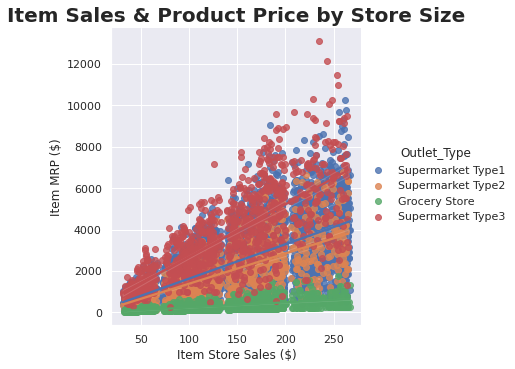

In [ ]:
sns.set_theme()

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=df,
    x="Item_MRP", y="Item_Outlet_Sales", hue="Outlet_Type", height=5)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Item Store Sales ($)", "Item MRP ($)")
plt.title('Item Sales & Product Price by Store Size', fontsize = 20, fontweight = 'bold');

##Interactive Visual Plots

In [ ]:
import plotly.express as px
import cufflinks as cf
import bokeh as bk
from IPython.display import display,HTML
!pip install chart_studio
!pip install plotly 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   object 
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,1.60%,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,1.93%,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,1.68%,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00%,Fruits and Vegetables,182.10,OUT010,1998,Missing,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00%,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


Price & Sales of Meat based on Outlet Size & Type
- smaller circles = lower MRP price
- bigger circles = higher MRP price

In [ ]:
fig = px.scatter(df.query("Item_Type=='Meat'"), x="Item_Outlet_Sales", y="Outlet_Size",
	         size="Item_MRP", color="Outlet_Type",
                 hover_name="Item_Identifier", log_x=True, size_max=60)
fig.show()

3d scatter Visual of Item Price, Visibility, Sales Compared to Outlet Types
- diffrent outlet types & outlet size = diffrent color & symbol
- outlet size with values as 'Missing' were removed for less clutter

In [ ]:
fig = px.scatter_3d(df.query("Outlet_Size !='Missing'"), x='Item_Outlet_Sales', y='Item_Visibility', z='Item_MRP',
                    color='Outlet_Type', symbol='Outlet_Size')
fig.show()

##Machine Learning - Analytical

In [ ]:
#Importing needed packages and library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [ ]:
df_ml.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#Checking columns and dtypes
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#Checking for missing values. No missing values in target column
df_ml.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Checking duplicates and no duplicates
df_ml.duplicated().sum()

0

In [ ]:
#Alot of unique values for Item_Visibility. So may take it out of the data features
#May take out Item_Identifier out also, but looks like not alot of unique values. So can be useful for machine learning but unsure
#Item MRP has high unique values but has a medium positive correlation with our target 
df_ml.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

    Since this is ordial data, i will use replacement dictionary to make =0, =1, =2 for Outlet_Size, Outlet_Location_Type, and Item Fat Content columns. 
    And change with replacment from object to number.

In [ ]:
df_ml['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
#Since there are NaN in data, later on they will be filled with mean or median thru column transformer
Outlet_Size_dictionary = {'Small':0, 'Medium':1, 'High':2}
df_ml['Outlet_Size'].replace(Outlet_Size_dictionary, inplace=True)
df_ml['Outlet_Size'].head()

0    1.0
1    1.0
2    1.0
3    NaN
4    2.0
Name: Outlet_Size, dtype: float64

In [ ]:
df_ml['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
Outlet_Location_dictionary = {'Tier 1':0, 'Tier 2':1, 'Tier 3':2}
df_ml['Outlet_Location_Type'].replace(Outlet_Location_dictionary, inplace=True)
df_ml['Outlet_Location_Type'].head()

0    0
1    2
2    0
3    2
4    2
Name: Outlet_Location_Type, dtype: int64

In [ ]:
# Also adding replacement dictionary to Item Fat Content due to typo errors
df_ml['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
ItemFat_Content_dictionary = {'Low Fat':0, 'LF':0, 'low fat':0, 'Regular':1, 'reg':1}
df_ml['Item_Fat_Content'].replace(ItemFat_Content_dictionary, inplace=True)
df_ml['Item_Fat_Content'].head()

0    0
1    1
2    0
3    1
4    0
Name: Item_Fat_Content, dtype: int64

In [ ]:
#Looking at correlation for columns
df_ml.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.023238,-0.014048,0.027141,-0.011588,0.011948,0.004715,0.014123
Item_Fat_Content,-0.023238,1.000000,0.047314,0.006063,0.003151,0.000979,-0.001598,0.018719
Item_Visibility,-0.014048,0.047314,1.000000,-0.001315,-0.074834,-0.096773,-0.028099,-0.128625
Item_MRP,0.027141,0.006063,-0.001315,1.000000,0.005020,-0.005827,0.000232,0.567574
Outlet_Establishment_Year,-0.011588,0.003151,-0.074834,0.005020,1.000000,-0.298431,-0.089216,-0.049135
Outlet_Size,0.011948,0.000979,-0.096773,-0.005827,-0.298431,1.000000,0.635185,0.129076
Outlet_Location_Type,0.004715,-0.001598,-0.028099,0.000232,-0.089216,0.635185,1.000000,0.089367
Item_Outlet_Sales,0.014123,0.018719,-0.128625,0.567574,-0.049135,0.129076,0.089367,1.000000


In [ ]:
#Looking at value counts i think it is better to drop column because may create unnecessary data
df_ml['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   float64
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 799.2+ KB


    - features matrix (X) = Item_Weight, Item_Fat_Content, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type
    (removed  Outlet_Identifier, Outlet_Establishment_Year, and Item_Identifier because they are not useful to machine learning for this target based on low correlations)

    - target (y)=  Item_Outlet_Sales

    - And performing a train test split. 
 

In [ ]:
# Validation Split features and target 
X = df_ml.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier' ,'Outlet_Establishment_Year'], axis=1)
y = df_ml['Item_Outlet_Sales']
# Also Train test split the data to prepare for machine learning.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,0,0.029565,Household,256.4646,1.0,2,Supermarket Type2
7510,15.250,1,0.000000,Snack Foods,179.7660,1.0,2,Supermarket Type2
5828,12.350,1,0.158716,Meat,157.2946,1.0,0,Supermarket Type1
5327,7.975,0,0.014628,Baking Goods,82.3250,0.0,1,Supermarket Type1
4810,19.350,0,0.016645,Frozen Foods,120.9098,NaN,1,Supermarket Type1
...,...,...,...,...,...,...,...,...
5734,9.395,1,0.286345,Fruits and Vegetables,139.1838,NaN,2,Grocery Store
5191,15.600,0,0.117575,Frozen Foods,75.6670,NaN,1,Supermarket Type1
5390,17.600,0,0.018944,Health and Hygiene,237.3590,NaN,1,Supermarket Type1
860,20.350,0,0.054363,Snack Foods,117.9466,NaN,1,Supermarket Type1


    Creating a preprocessing object to prepare the dataset for Machine Learning

In [ ]:
#Using column selectors to use with our column transformer.  
cal_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
# Using Scaler
scaler = StandardScaler()
# Using One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# Using Imputers for freq, mean, and constants
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

In [ ]:
# Numeric pipeline for numbers
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
# Categorical pipeline for objects
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
# Tuples for Column Transformer, number tuple, category tuple, constant tuple
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cal_selector)


In [ ]:
#Using column transformer with diagram
preprocessing = make_column_transformer(number_tuple,category_tuple)
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe7c9f84c50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe7c9f84850>)])

In [ ]:
#fiting X_train data
preprocessing.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe7c9f84c50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe7c9f84850>)])

In [ ]:
#TRansforming both the train and test data
X_train_processed = preprocessing.transform(X_train)
X_test_processed = preprocessing.transform(X_test)

In [ ]:
#Checking array on train data, looks good.
X_train_processed

array([[ 0.81724868, -0.7403206 , -0.71277507, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 ,  1.35076614, -1.29105225, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.35076614,  1.81331864, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.7403206 , -0.92052713, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.7403206 , -0.2277552 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.7403206 , -0.95867683, ...,  1.        ,
         0.        ,  0.        ]])

    Taking a look at the train and test data for missing values, checking dtype, and making sure shape looks fine. Everything looks good.

In [ ]:
#Printing data for easy viewing
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 26)




array([[ 0.81724868, -0.7403206 , -0.71277507, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 ,  1.35076614, -1.29105225, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.35076614,  1.81331864, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.7403206 , -0.92052713, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.7403206 , -0.2277552 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.7403206 , -0.95867683, ...,  1.        ,
         0.        ,  0.        ]])

##Regression Models to Predict Outlet Sales

In [ ]:
# Importing needed files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor #Used to test model
from sklearn.ensemble import BaggingRegressor #Used to test model
from sklearn.tree import plot_tree
from sklearn import set_config
set_config(display='diagram')

In [ ]:
#Checking data for duplicates again
df_ml.duplicated().sum()

0

In [ ]:
#Checking dtypes
df_ml.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type           int64
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
#Checking train array
X_train_processed

array([[ 0.81724868, -0.7403206 , -0.71277507, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 ,  1.35076614, -1.29105225, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.35076614,  1.81331864, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.7403206 , -0.92052713, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.7403206 , -0.2277552 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.7403206 , -0.95867683, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
#Checking test array
X_test_processed

array([[ 0.33100885, -0.7403206 , -0.77664625, ...,  1.        ,
         0.        ,  0.        ],
       [-1.17989246, -0.7403206 ,  0.1003166 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.37844688,  1.35076614, -0.48299432, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.13957013, -0.7403206 ,  1.21832428, ...,  1.        ,
         0.        ,  0.        ],
       [-1.49772727, -0.7403206 , -0.77809567, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.52076098, -0.7403206 , -0.77976293, ...,  1.        ,
         0.        ,  0.        ]])

Building a linear regression model to predict outlet sales.

In [ ]:
# Import the and instantiate the linear regression model
reg = LinearRegression()

In [ ]:
#Create a modeling pipeline, using previous scaler and reg from above
line_reg_pipe = make_pipeline(scaler, reg)

In [ ]:
#Fitting model to training data
line_reg_pipe.fit(X_train_processed,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
##Make predictions using the train and testing data.
train_pred = line_reg_pipe.predict(X_train_processed)
test_pred = line_reg_pipe.predict(X_test_processed)

In [ ]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

- Evaluating the performance of the linear model based on r^2.

In [ ]:
#Using Scikit-Learn to calculate r2.
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

Model Training R2: 0.56025973262175
Model Testing R2: 0.5654959686954459


- Evaluating the performance of the linear model based on Mean Squared Error (MSE).

In [ ]:
#Using Scikit-Learn to calculate MSE.
train_MSE = mean_squared_error(y_train, train_pred)
test_MSE = mean_squared_error(y_test, test_pred)
print(f'Model Traing MSE: {train_MSE}')
print(f'Model Testing MSE: {test_MSE}')

Model Traing MSE: 1301391.8428025963
Model Testing MSE: 1198786.7538296962


- Evaluating the performance of the linear model based on Root Mean Squared Error (RMSE).

In [ ]:
#Using sklearn to find the MSE and just include the square root to get RMSE
train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)
print(f'Model training RMSE: {train_RMSE}')
print(f'Model testing RMSE: {test_RMSE}')

Model training RMSE: 1140.7856252612041
Model testing RMSE: 1094.891206389793


Building a regression tree model to predict outlet sales.

In [ ]:
# Import the and instantiate the regression tree model
tree_reg = RandomForestRegressor(random_state = 42)

In [ ]:
#Create a modeling pipeline, using previous scaler and tree_reg from above
tree_reg_pipe = make_pipeline(scaler, tree_reg)

In [ ]:
#Fitting model to training data
tree_reg_pipe.fit(X_train_processed,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
#Making predictions using the train and testing data.
tree_train_pred = tree_reg_pipe.predict(X_train_processed)
tree_test_pred = tree_reg_pipe.predict(X_test_processed)

In [ ]:
#Checking parameters for random forest
tree_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

- Evaluating the performance of the regressor tree model based on r^2.

In [ ]:
#Using Scikit-Learn to calculate r2.
tree_train_r2 = r2_score(y_train, tree_train_pred)
tree_test_r2 = r2_score(y_test, tree_test_pred)
print(f'Model Training R2: {tree_train_r2}')
print(f'Model Testing R2: {tree_test_r2}')

Model Training R2: 0.937062031291833
Model Testing R2: 0.5436785966748476


- Evaluating the performance of the regressor tree model based on Mean Squared Error (MSE).

In [ ]:
#Using Scikit-Learn to calculate MSE for tree
tree_train_MSE = mean_squared_error(y_train, tree_train_pred)
tree_test_MSE = mean_squared_error(y_test, tree_test_pred)
print(f'Model Traing MSE: {tree_train_MSE}')
print(f'Model Testing MSE: {tree_test_MSE}')

Model Traing MSE: 186262.1305246988
Model Testing MSE: 1258980.3877141555


- Evaluating the performance of the regressor tree model based on Root Mean Squared Error (RMSE).

In [ ]:
tree_train_RMSE = np.sqrt(tree_train_MSE)
tree_test_RMSE = np.sqrt(tree_test_MSE)
print(f'Model training RMSE: {tree_train_RMSE}')
print(f'Model testing RMSE: {tree_test_RMSE}')

Model training RMSE: 431.5809663605414
Model testing RMSE: 1122.0429527046438


Based on the 2 different models (linear & Random Forest) tested on the data set. I determined the best model to implement would be the the linear. Although, both were not amazing. I recommend the linear model for several reasons. 

1. The R2 or the coefficient of determination, showed a better prediction of the test data. With 
an R2 of .56 means that the model can explain 56% of the variation in the target data.

2. The RMSE or Root Mean Squared Error had the least error diffrence in dollars. An RMSE of 1094, tells us that our model is making an average error of 1,094 dollars on the test data. While, the othere model had an average error of 1,122 dollars on the test data.

3. The Rabdom Forest model has an high variance and is overfit. Thus, predicts the training data better than linear model, but does not predict the testing data as well as the linear model. 
